In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_style("whitegrid", {'axes.grid' : False})
# sns.set_style("whitegrid")


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

# Supervised-Classifier-metrics
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

# Supervised-cross_validate-GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("From Kaggle(my work)/cleaned_train.csv")
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,26.822620,265.0,No,49.574949,24.785217,High_spent_Small_value_payments,312.494089,Good
1,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,31.944960,266.0,No,49.574949,24.785217,Low_spent_Large_value_payments,284.629162,Good
2,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,28.609352,267.0,No,49.574949,24.785217,Low_spent_Medium_value_payments,331.209863,Good
3,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,31.377862,268.0,No,49.574949,24.785217,Low_spent_Small_value_payments,223.451310,Good
4,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,24.797347,269.0,No,49.574949,24.785217,High_spent_Medium_value_payments,341.489231,Good


In [8]:
list(df.columns)

['Customer_ID',
 'Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Month                     100000 non-null  int64  
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              100000 non-null  object 
 11  Delay_from_due_date       100000 non-null  float64
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  fl

In [5]:
df.drop(columns=["Customer_ID"], inplace=True)

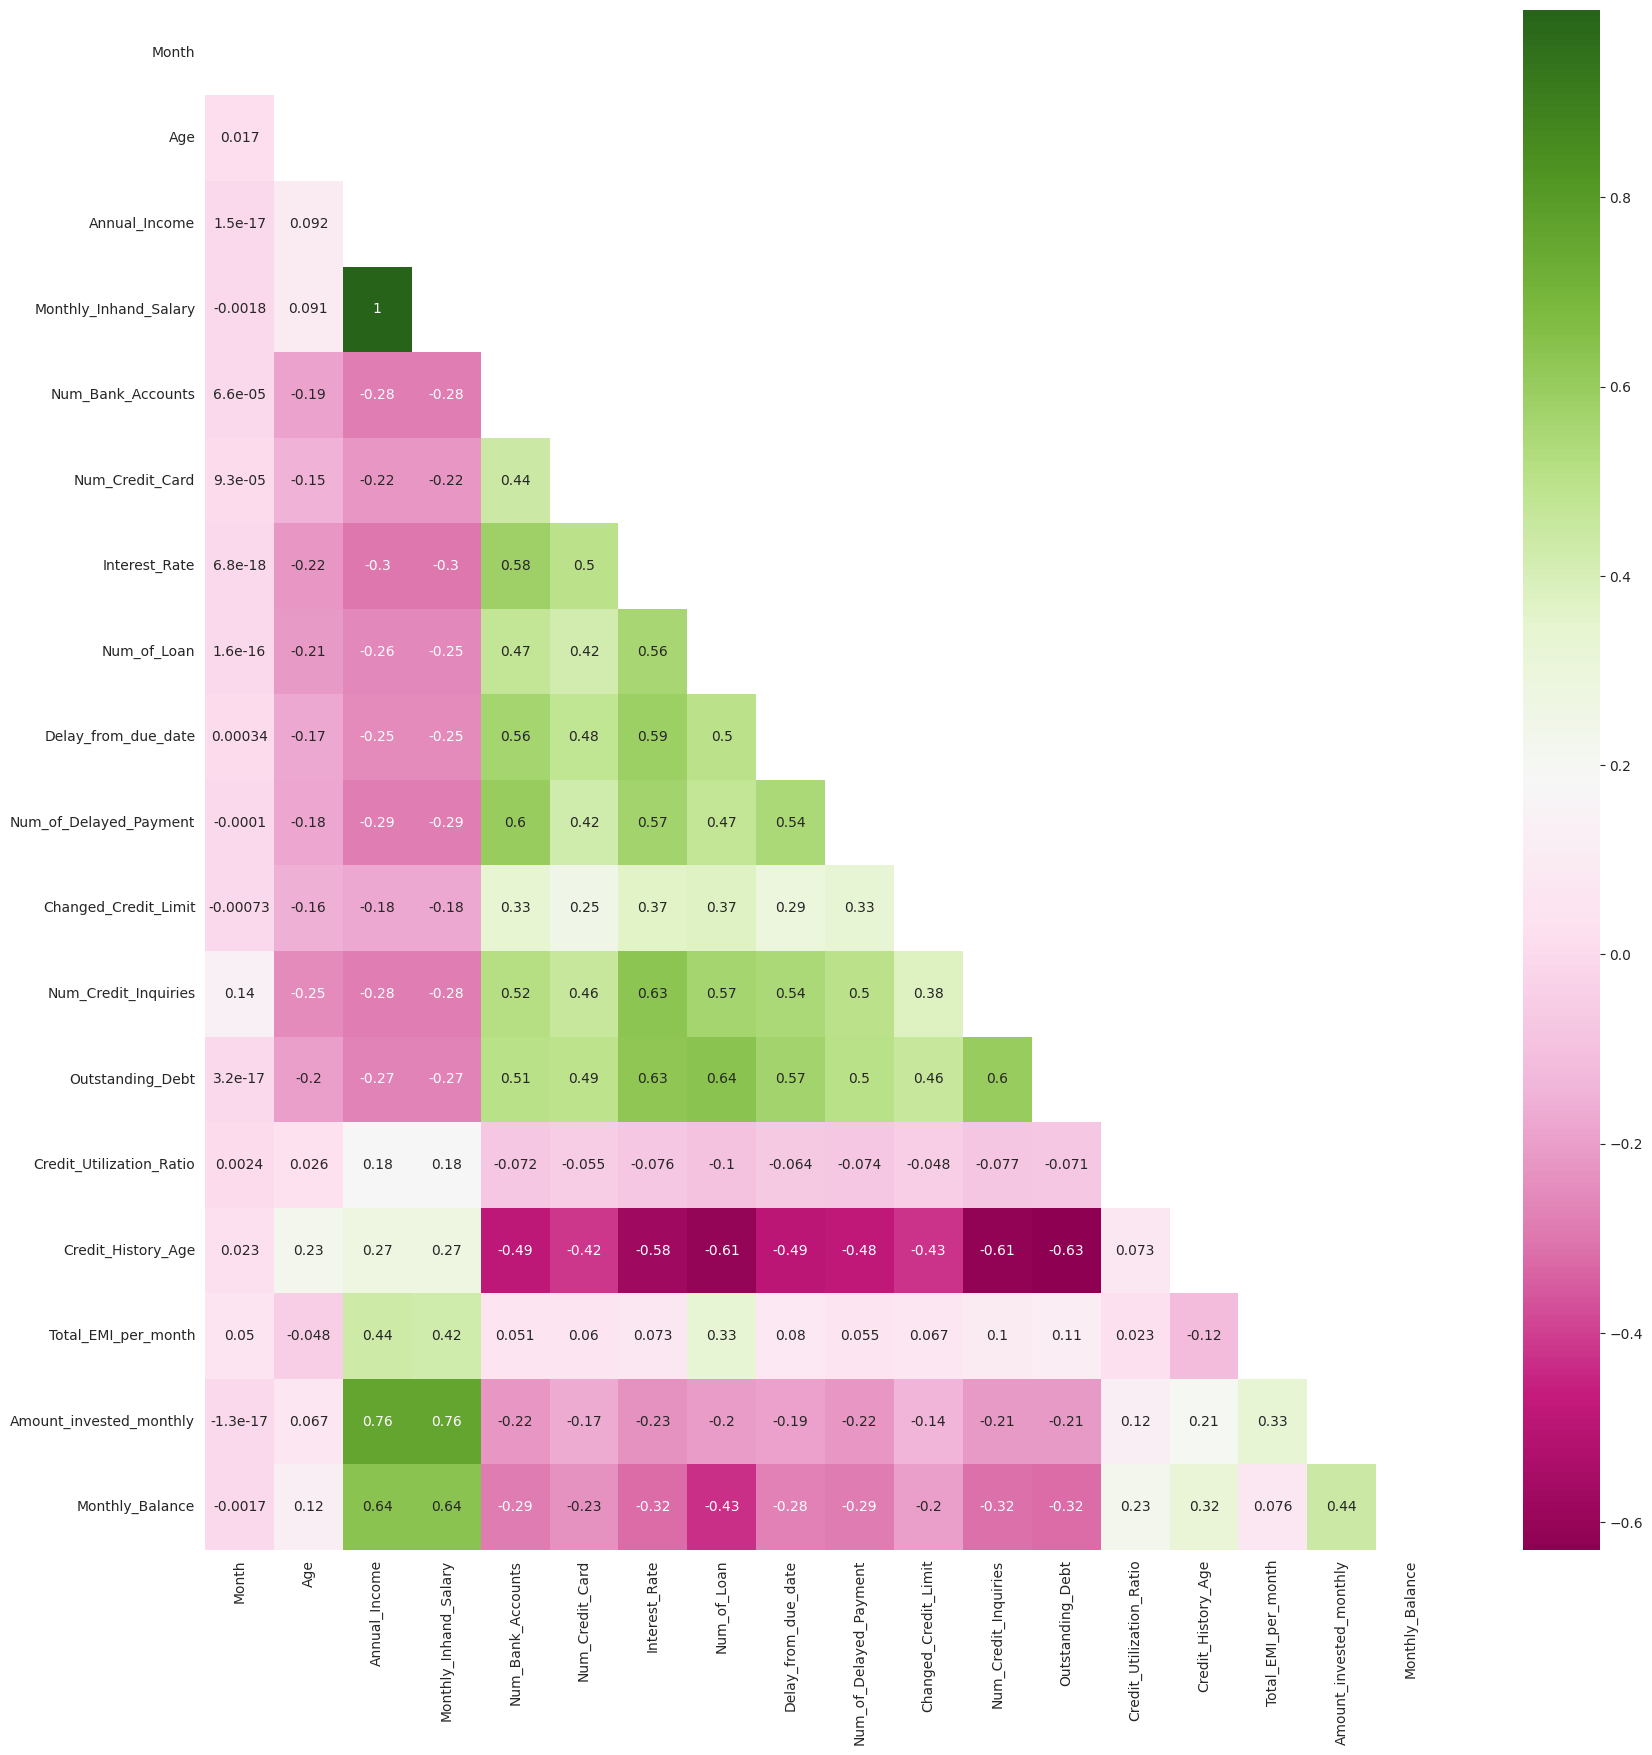

In [6]:
# Correlation between Numerical features
plt.figure(figsize=(20, 20))
sns.heatmap(df.select_dtypes(include = "number").corr(), 
            mask=np.triu(np.ones_like(df.select_dtypes(include = "number").corr(), dtype=bool)), 
            annot=True, cmap="PiYG")
plt.show()

In [7]:
# Monthly in hand salary and anual income highly correlated

In [8]:
X = df.drop(columns=["Credit_Score"])
y = df["Credit_Score"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70000, 23)
(70000,)
(30000, 23)
(30000,)


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# should be used to encode target values, i.e. y, and not the input X.

In [12]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin

class GetDummies(BaseEstimator, TransformerMixin): 
    def __init__(self, data_sep=',', col_name_sep='_'):
        self.data_sep     = data_sep
        self.col_name_sep = col_name_sep
        
    def fit(self, X, y  = None): 
        object_cols       = X.select_dtypes(include="object").columns
        self.dummy_cols   = [col for col in object_cols if X[col].str.contains(self.data_sep, regex=True).any()]
        self.dummy_prefix = [''.join(map(lambda x: x[0], col.split(self.col_name_sep)))  if self.col_name_sep in col else col[:2] for col in self.dummy_cols]
        
        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            dummy_X = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))            
            
        dummy_X.drop(columns = self.dummy_cols, inplace=True)
        self.columns = dummy_X.columns
        return self
    
    def transform(self, X, y = None):
        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            X_transformed = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))   

        X_transformed = X_transformed.reindex(columns=self.columns, fill_value=0)          
        return X_transformed
        
    # to get feature names    
    def get_feature_names_out(self, input_features=None):
        return self.columns.tolist()

In [14]:
dummy = GetDummies()
X_train_dummy = dummy.fit_transform(X_train)
X_test_dummy   = dummy.transform(X_test)
# Note : Now the column Type of loan has been dropped and instead we have one hot vectors for its place.

In [15]:
print(X_train_dummy.shape, X_test_dummy.shape)

(70000, 32) (30000, 32)


In [16]:
X_train_dummy = X_train_dummy.reset_index(drop=True)
X_test_dummy = X_test_dummy.reset_index(drop=True)

In [17]:
from sklearn.preprocessing import OneHotEncoder
# remaining categorical varaible needs to be converted into numbers.
# Nominal data represents categories without any inherent order or hierarchy. 
# Each category is independent of others. One-hot encoding is commonly used for nominal data.
cat = X_train_dummy.select_dtypes(include="object").columns.tolist()   
print('OneHotEncoder:', cat)
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
# sparse_output=False then the output of fit_transform will be a numpy array which can be easily converted to dataframe

# sparse_output=True then the output of fit_transform will be a sparse matrix which cannot be easily converted to dataframe

# for example
# <38x4 sparse matrix of type '<class 'numpy.float64'>'
# 	with 38 stored elements in Compressed Sparse Row format>

OneHotEncoder: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


In [19]:
import numpy as np
Xx = np.array([["a"] * 5 + ["b"] * 20 + ["c"] * 10 + ["d"] * 3], dtype=object).T
ohe2 = OneHotEncoder(sparse_output=True)
ohe2.fit_transform(Xx)

<38x4 sparse matrix of type '<class 'numpy.float64'>'
	with 38 stored elements in Compressed Sparse Row format>

In [20]:
ohe2.fit_transform(Xx).shape

(38, 4)

In [21]:
ohe3 = OneHotEncoder(sparse_output=False)
ohe3.fit_transform(Xx)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [22]:
ohe3.fit_transform(Xx).shape

(38, 4)

In [23]:
X_train_dummy.shape

(70000, 32)

In [24]:
X_train_dummy.select_dtypes("number").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Month                        70000 non-null  int64  
 1   Age                          70000 non-null  float64
 2   Annual_Income                70000 non-null  float64
 3   Monthly_Inhand_Salary        70000 non-null  float64
 4   Num_Bank_Accounts            70000 non-null  float64
 5   Num_Credit_Card              70000 non-null  float64
 6   Interest_Rate                70000 non-null  float64
 7   Num_of_Loan                  70000 non-null  float64
 8   Delay_from_due_date          70000 non-null  float64
 9   Num_of_Delayed_Payment       70000 non-null  float64
 10  Changed_Credit_Limit         70000 non-null  float64
 11  Num_Credit_Inquiries         70000 non-null  float64
 12  Outstanding_Debt             70000 non-null  float64
 13  Credit_Utilizati

In [25]:
# np.array_equal(ohe.get_feature_names_out(cat),ohe.get_feature_names_out())

In [26]:
# pd.DataFrame(ohe.fit_transform(X_train_dummy[cat]), columns = ohe.get_feature_names_out(cat))

In [27]:
X_train_cat = pd.DataFrame(ohe.fit_transform(X_train[cat]),columns=ohe.get_feature_names_out())
X_test_cat = pd.DataFrame(ohe.transform(X_test[cat]),columns=ohe.get_feature_names_out())

In [28]:
np.array_equal(ohe.get_feature_names_out(cat),ohe.get_feature_names_out())

True

In [29]:
X_train_ohe = X_train_cat.join(X_train_dummy.select_dtypes("number"))
X_test_ohe = X_test_cat.join(X_test_dummy.select_dtypes("number"))

In [30]:
print(X_train_ohe.shape, X_test_ohe.shape)

(70000, 55) (30000, 55)


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [32]:
X_train_scaled = sc.fit_transform(X_train_ohe)
X_test_scaled = sc.transform(X_test_ohe)

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 1337)

In [34]:
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=1337)

In [35]:
y_pred = rfc.predict(X_test_scaled)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      5322
           1       0.81      0.85      0.83      8805
           2       0.85      0.83      0.84     15873

    accuracy                           0.83     30000
   macro avg       0.82      0.82      0.82     30000
weighted avg       0.83      0.83      0.83     30000



In [37]:
import pickle

In [38]:
# save the model
filename = "credit_score_multi_class_rfc_model.pkl"
pickle.dump(rfc, open("models/rfc_model.pkl", "wb"))

In [40]:
pickle.dump(ohe, open("models/credit_score_multi_class_ohe_encoder.pkl", 'wb'))
pickle.dump(le,  open("models/credit_score_multi_class_le.pkl", 'wb'))
pickle.dump(sc,  open("models/credit_score_multi_class_sc.pkl", 'wb'))